<a href="https://colab.research.google.com/github/ReinaldoDiasAbreu/classificacao_iris/blob/main/Exerc%C3%ADcio_5_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
!pip install pydataset

## Carregando pacotes 

In [426]:
from pydataset import data
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
%matplotlib inline

## Carregando base de dados Iris

In [378]:
dataset = data('iris')

In [379]:
df = pd.DataFrame(list(zip(dataset['Sepal.Length'], dataset['Species'])), columns = ['sepal_length','species'])
df.head()

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa


## Categorias do dataset

In [380]:
# Categorias do target
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [381]:
# Função para categorizar a base de dados numericamente
def categorizando_especie(x):
  if x == 'setosa':
    return 0 
  elif x == 'versicolor':
    return 1
  else:
    return 2

df['species'] = df['species'].apply(categorizando_especie)
#df.drop('species', axis=1, inplace=True)
df.head()


,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


## Separando dados teste

In [382]:
df1 = df.copy()
df1.insert(0, 'b0', 1)
df1.head()

,b0,sepal_length,species
0,1,5.1,0
1,1,4.9,0
2,1,4.7,0
3,1,4.6,0
4,1,5.0,0


In [386]:
# Separando dados de teste 
X = df1.drop('species',axis=1)
y = df1.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Regressão Logística



In [387]:
classificador = LogisticRegression()
classificador.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Testando com valores específicos

In [388]:
s = classificador.predict([[1, 5.1]]) # Setosa (0)
v = classificador.predict([[1, 6.2]]) # Virginica (2)
print(s, v)

[0] [2]


## Realizando teste do modelo

In [389]:
y_predict = classificador.predict(X_test)
y_predict

array([2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2,
       2])

## Visualizando a matriz de confusão

In [390]:
cm_rl = confusion_matrix(y_test, y_predict)
print(cm_rl)

[[15  2  0]
 [ 3  8  5]
 [ 0  2 10]]


In [391]:
cr_rl = classification_report(y_test, y_predict)
print(cr_rl)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.67      0.50      0.57        16
           2       0.67      0.83      0.74        12

    accuracy                           0.73        45
   macro avg       0.72      0.74      0.72        45
weighted avg       0.73      0.73      0.72        45



## Árvore de Decisão

In [392]:
X_train2 = X_train['sepal_length']
X_test2 = X_test['sepal_length']
y_train2, y_test2 = y_train, y_test

In [393]:
X_train2 = X_train2.to_frame()
X_test2 = X_test2.to_frame()

### Treinando Modelo de AD

In [394]:
arvore = DecisionTreeClassifier(criterion="gini")
arvore.fit(X_train2, y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

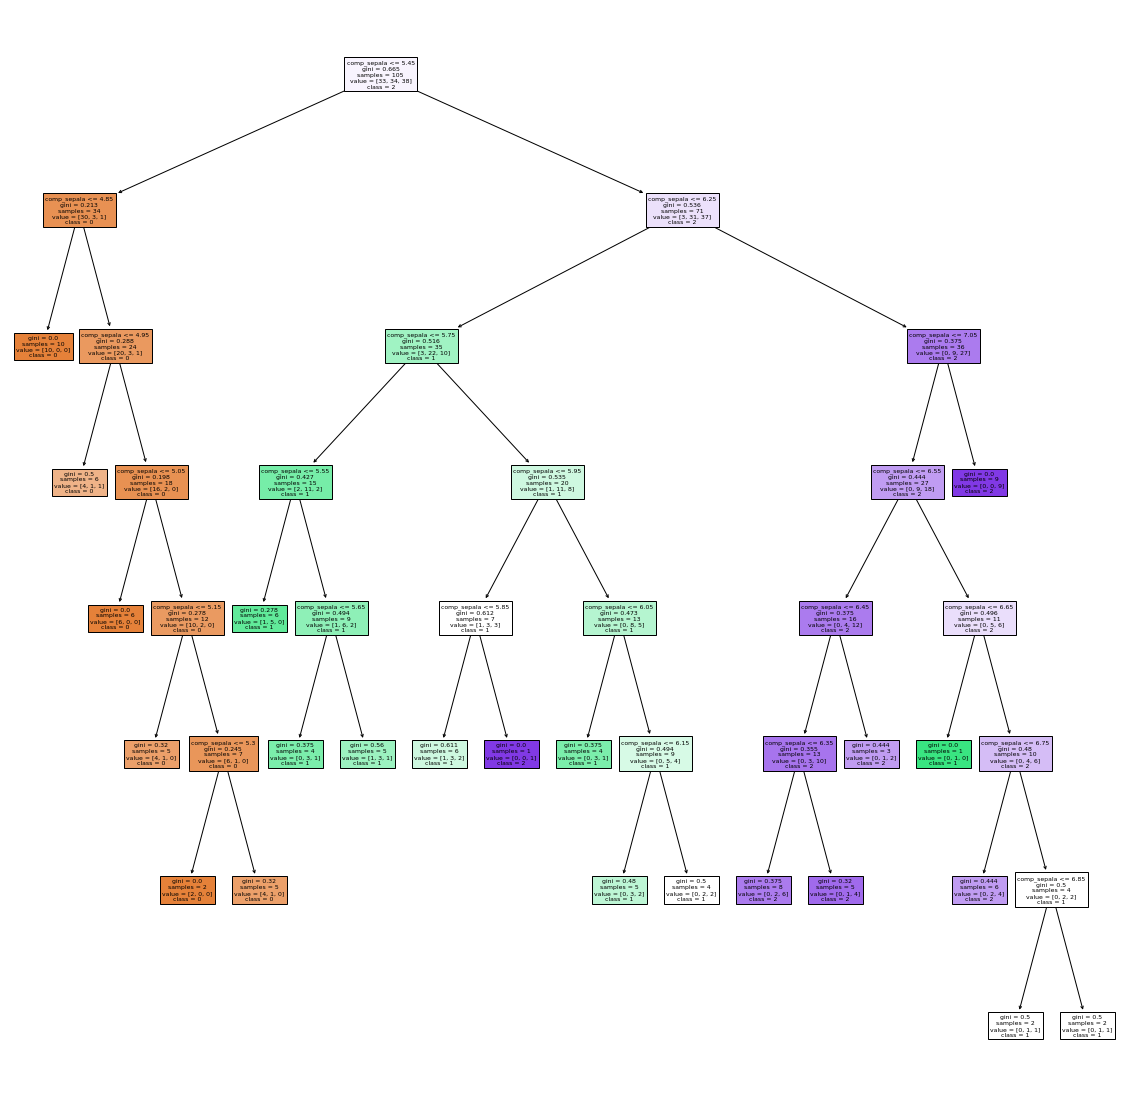

In [395]:
from sklearn import tree
import matplotlib.pyplot as plt
figura, axis = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
t = tree.plot_tree(arvore, feature_names=['comp_sepala'], class_names=['0','1','2'], filled=True)

### Realizando teste do modelo

In [396]:
y_predict = arvore.predict(X_test2)
y_predict

array([1, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2,
       2])

## Visualizando a matriz de confusão

In [397]:
cm_ad = confusion_matrix(y_test2, y_predict)
print(cm_ad)

[[15  2  0]
 [ 3  8  5]
 [ 0  5  7]]


In [399]:
cr_ad = classification_report(y_test2, y_predict)
print(cr_ad)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.53      0.50      0.52        16
           2       0.58      0.58      0.58        12

    accuracy                           0.67        45
   macro avg       0.65      0.66      0.65        45
weighted avg       0.66      0.67      0.66        45



# K_means

In [467]:
df3 = df.copy()
X = df3.drop('species',axis=1)
y = df3.species


In [474]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [475]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [476]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2], dtype=int32)

In [477]:
df3['kmeans'] = kmeans.labels_

In [479]:
df3.head()

,sepal_length,species,kmeans
0,5.1,0,0
1,4.9,0,0
2,4.7,0,0
3,4.6,0,0
4,5.0,0,0


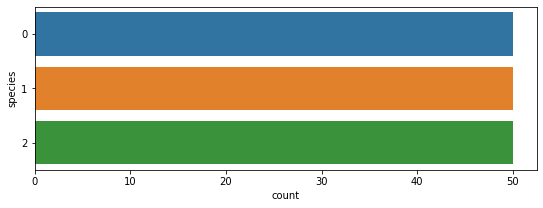

In [480]:
plt.figure(1 , figsize = (9, 3))
sp.countplot(y = 'species' , data = df3)
plt.show()

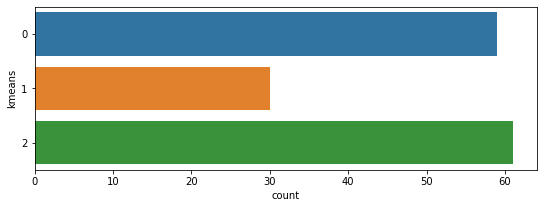

In [481]:
plt.figure(1 , figsize = (9, 3))
sp.countplot(y = 'kmeans' , data = df3)
plt.show()

In [484]:
df_group = df3.drop(["sepal_length"],axis=1).groupby("species")
df_group.describe()

kmeans                                         
         count  mean       std  min  25%  50%  75%  max
species                                                
0         50.0  0.12  0.479796  0.0  0.0  0.0  0.0  2.0
1         50.0  1.40  0.832993  0.0  1.0  2.0  2.0  2.0
2         50.0  1.52  0.543609  0.0  1.0  2.0  2.0  2.0

In [485]:
df_group = df3.drop(["sepal_length"],axis=1).groupby("kmeans")
df_group.describe()

species                                              
         count      mean       std  min   25%  50%  75%  max
kmeans                                                      
0         59.0  0.220339  0.457421  0.0  0.00  0.0  0.0  2.0
1         30.0  1.733333  0.449776  1.0  1.25  2.0  2.0  2.0
2         61.0  1.393443  0.585340  0.0  1.00  1.0  2.0  2.0